In [26]:
from scipy.stats import f_oneway

groups = [g["Global_Sales"].values for _, g in df.groupby("decade") if len(g) > 1]

f_stat, p_value3 = f_oneway(*groups)
f_stat, p_value3

(np.float64(45.601018716391856), np.float64(3.695199454739841e-38))

In [27]:
ps = df[df["platform_family"] == "PlayStation"]["Global_Sales"]
nt = df[df["platform_family"] == "Nintendo"]["Global_Sales"]

t_stat2, p_value2 = ttest_ind(ps, nt, equal_var=False)
t_stat2, p_value2

(np.float64(-1.0839274960576333), np.float64(0.27843274421390957))

In [28]:
from scipy.stats import ttest_ind

mp = df[df["game_type"] == "multiplayer"]["Global_Sales"]
sp = df[df["game_type"] == "singleplayer"]["Global_Sales"]

t_stat, p_value = ttest_ind(mp, sp, equal_var=False)  # Welch t-test
t_stat, p_value

(np.float64(3.278251420521273), np.float64(0.0010469778507734913))

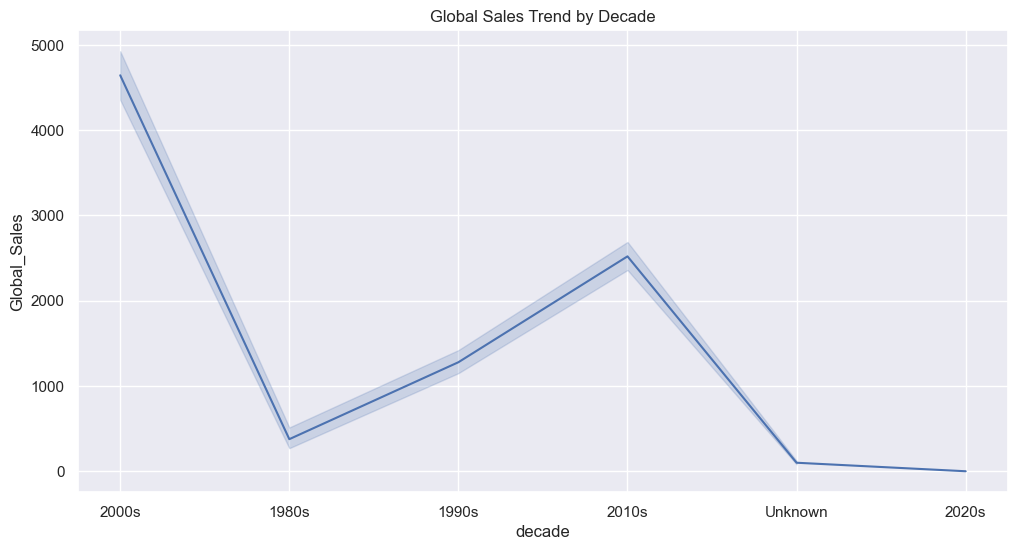

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x="decade", y="Global_Sales", data=df, estimator=sum)
plt.title("Global Sales Trend by Decade")
plt.show()

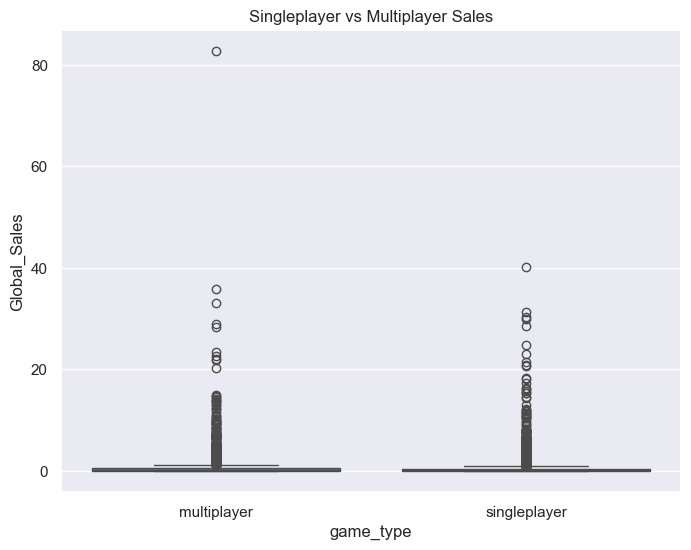

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="game_type", y="Global_Sales", data=df)
plt.title("Singleplayer vs Multiplayer Sales")
plt.show()

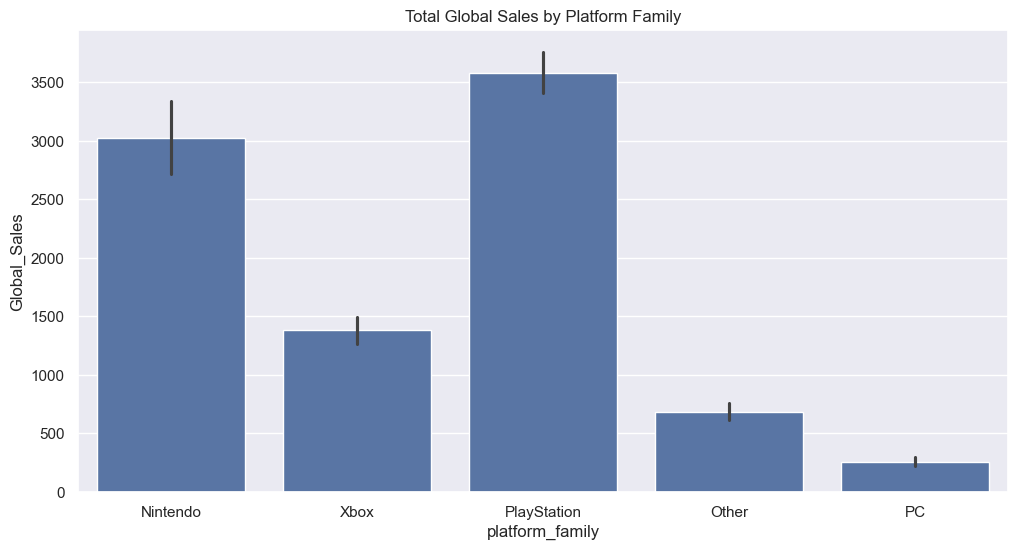

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x="platform_family", y="Global_Sales", data=df, estimator=sum)
plt.title("Total Global Sales by Platform Family")
plt.show()

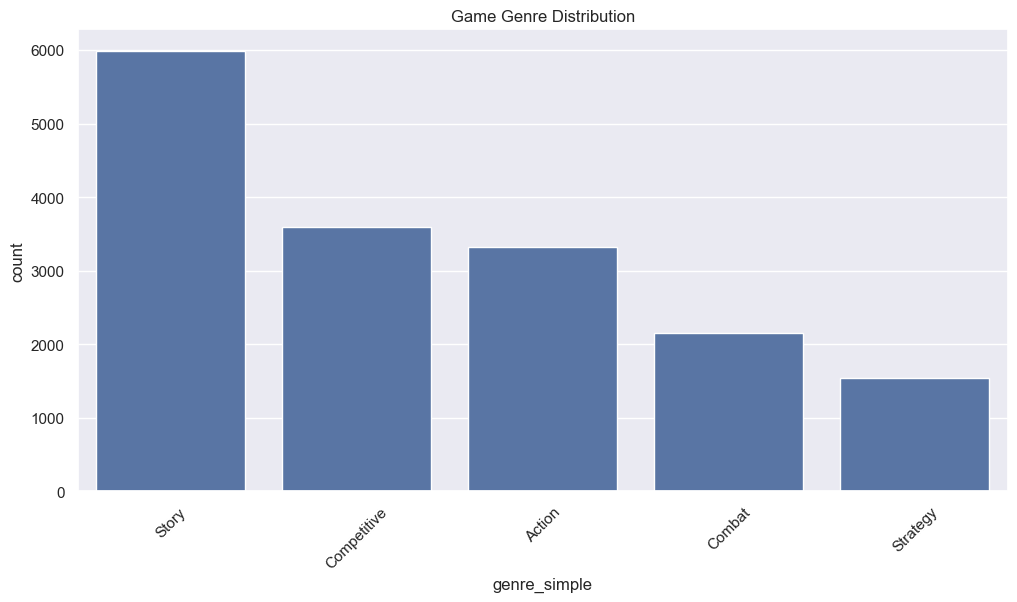

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x="genre_simple", data=df, order=df["genre_simple"].value_counts().index)
plt.title("Game Genre Distribution")
plt.xticks(rotation=45)
plt.show()

In [12]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,sales_cat,platform_family,game_type,genre_simple
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,high,Nintendo,multiplayer,Competitive
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,high,Nintendo,singleplayer,Story
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,high,Nintendo,multiplayer,Competitive
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,high,Nintendo,multiplayer,Competitive
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,high,Nintendo,singleplayer,Story


In [11]:
def simplify_genre(g):
    g = g.lower()
    if g in ["action", "action-adventure"]:
        return "Action"
    if g in ["fighting", "shooter"]:
        return "Combat"
    if g in ["racing", "sports"]:
        return "Competitive"
    if g in ["strategy", "simulation"]:
        return "Strategy"
    return "Story"

df["genre_simple"] = df["Genre"].apply(simplify_genre)
df[["Name", "Genre", "genre_simple"]].head()

,Name,Genre,genre_simple
0,Wii Sports,Sports,Competitive
1,Super Mario Bros.,Platform,Story
2,Mario Kart Wii,Racing,Competitive
3,Wii Sports Resort,Sports,Competitive
4,Pokemon Red/Pokemon Blue,Role-Playing,Story


In [10]:
def game_type(genre):
    g = genre.lower()
    if any(x in g for x in ["sports", "racing", "fighting", "shooter", "misc"]):
        return "multiplayer"
    return "singleplayer"

df["game_type"] = df["Genre"].apply(game_type)
df[["Name", "Genre", "game_type"]].head()

,Name,Genre,game_type
0,Wii Sports,Sports,multiplayer
1,Super Mario Bros.,Platform,singleplayer
2,Mario Kart Wii,Racing,multiplayer
3,Wii Sports Resort,Sports,multiplayer
4,Pokemon Red/Pokemon Blue,Role-Playing,singleplayer


In [9]:
def platform_family(p):
    p = p.lower()
    if "ps" in p:
        return "PlayStation"
    if "x" in p:
        return "Xbox"
    if p in ["wii", "ds", "3ds", "snes", "nes", "gb", "gba"]:
        return "Nintendo"
    if p == "pc":
        return "PC"
    return "Other"

df["platform_family"] = df["Platform"].apply(platform_family)
df[["Name", "Platform", "platform_family"]].head()

,Name,Platform,platform_family
0,Wii Sports,Wii,Nintendo
1,Super Mario Bros.,NES,Nintendo
2,Mario Kart Wii,Wii,Nintendo
3,Wii Sports Resort,Wii,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Nintendo


In [19]:
import pandas as pd  # zaten yukarıda var ama dursun

def decade(y):
    # yıl eksikse
    if pd.isna(y):
        return "Unknown"
    y = int(float(y))
    return f"{(y//10)*10}s"

df["decade"] = df["Year"].apply(decade)
df[["Name", "Year", "decade"]].head()

,Name,Year,decade
0,Wii Sports,2006.0,2000s
1,Super Mario Bros.,1985.0,1980s
2,Mario Kart Wii,2008.0,2000s
3,Wii Sports Resort,2009.0,2000s
4,Pokemon Red/Pokemon Blue,1996.0,1990s


In [ ]:
def simplify_genre(g):
    g = g.lower()
    if g in ["action", "action-adventure"]:
        return "Action"
    if g in ["fighting", "shooter"]:
        return "Combat"
    if g in ["racing", "sports"]:
        return "Competitive"
    if g in ["strategy", "simulation"]:
        return "Strategy"
    return "Story"

df["genre_simple"] = df["Genre"].apply(simplify_genre)
df[["Name", "Genre", "genre_simple"]].head()

In [ ]:
def game_type(genre):
    g = genre.lower()
    if any(x in g for x in ["sports", "racing", "fighting", "shooter", "misc"]):
        return "multiplayer"
    return "singleplayer"

df["game_type"] = df["Genre"].apply(game_type)
df[["Name", "Genre", "game_type"]].head()


In [ ]:
def platform_family(p):
    p = p.lower()
    if "ps" in p:
        return "PlayStation"
    if "x" in p:
        return "Xbox"
    if p in ["wii", "ds", "3ds", "snes", "nes", "gameboy", "gba"]:
        return "Nintendo"
    if p == "pc":
        return "PC"
    return "Other"

df["platform_family"] = df["Platform"].apply(platform_family)
df[["Name", "Platform", "platform_family"]].head()

In [31]:
import pandas as pd  

def decade(y):
    # yıl eksikse
    if pd.isna(y):
        return "Unknown"
    y = int(float(y))
    return f"{(y//10)*10}s"

df["decade"] = df["Year"].apply(decade)
df[["Name", "Year", "decade"]].head()

,Name,Year,decade
0,Wii Sports,2006.0,2000s
1,Super Mario Bros.,1985.0,1980s
2,Mario Kart Wii,2008.0,2000s
3,Wii Sports Resort,2009.0,2000s
4,Pokemon Red/Pokemon Blue,1996.0,1990s


In [3]:
def sales_category(x):
    if x < 1:
        return "low"
    elif x < 5:
        return "mid"
    else:
        return "high"

df["sales_cat"] = df["Global_Sales"].apply(sales_category)
df[["Name", "Global_Sales", "sales_cat"]].head()

,Name,Global_Sales,sales_cat
0,Wii Sports,82.74,high
1,Super Mario Bros.,40.24,high
2,Mario Kart Wii,35.82,high
3,Wii Sports Resort,33.00,high
4,Pokemon Red/Pokemon Blue,31.37,high


In [2]:
df = pd.read_csv("../data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()